In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set up plotting style
plt.style.use('default')
sns.set_palette("husl")

print("📊 Analyzing FY2025 Property Assessment Data")
print("=" * 50)


📊 Analyzing FY2025 Property Assessment Data


In [2]:
# Load the raw property assessment data
print("Loading raw property assessment data...")
df = pd.read_csv('../data/raw/fy2025-property-assessment-data_12_30_2024.csv')

print(f"✅ Loaded {len(df):,} total records")
print(f"📋 Dataset shape: {df.shape}")
print(f"💾 Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.1f} MB")


Loading raw property assessment data...


/var/folders/37/0zy_nm5d0rv5b6vp7z9r6hfh0000gp/T/ipykernel_33438/3505709385.py:3: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/raw/fy2025-property-assessment-data_12_30_2024.csv')


✅ Loaded 183,445 total records
📋 Dataset shape: (183445, 66)
💾 Memory usage: 406.2 MB


In [3]:
# Explore the column structure
print("🔍 Column Analysis")
print("=" * 30)
print(f"Total columns: {len(df.columns)}")
print("\nColumn names:")
for i, col in enumerate(df.columns):
    print(f"{i+1:2d}. {col}")

# Look for PID-related columns
pid_columns = [col for col in df.columns if 'pid' in col.lower() or 'parcel' in col.lower()]
print(f"\n🏠 PID-related columns found: {pid_columns}")

# Check data types
print(f"\n📊 Data types:")
print(df.dtypes.value_counts())


🔍 Column Analysis
Total columns: 66

Column names:
 1. PID
 2. CM_ID
 3. GIS_ID
 4. ST_NUM
 5. ST_NUM2
 6. ST_NAME
 7. UNIT_NUM
 8. CITY
 9. ZIP_CODE
10. BLDG_SEQ
11. NUM_BLDGS
12. LUC
13. LU
14. LU_DESC
15. BLDG_TYPE
16. OWN_OCC
17. OWNER
18. MAIL_ADDRESSEE
19. MAIL_STREET_ADDRESS
20. MAIL_CITY
21. MAIL_STATE
22. MAIL_ZIP_CODE
23. RES_FLOOR
24. CD_FLOOR
25. RES_UNITS
26. COM_UNITS
27. RC_UNITS
28. LAND_SF
29. GROSS_AREA
30. LIVING_AREA
31. LAND_VALUE
32. BLDG_VALUE
33. SFYI_VALUE
34. TOTAL_VALUE
35.  GROSS_TAX 
36. YR_BUILT
37. YR_REMODEL
38. STRUCTURE_CLASS
39. ROOF_STRUCTURE
40. ROOF_COVER
41. INT_WALL
42. EXT_FNISHED
43. INT_COND
44. EXT_COND
45. OVERALL_COND
46. BED_RMS
47. FULL_BTH
48. HLF_BTH
49. KITCHENS
50. TT_RMS
51. BDRM_COND
52. BTHRM_STYLE1
53. BTHRM_STYLE2
54. BTHRM_STYLE3
55. KITCHEN_TYPE
56. KITCHEN_STYLE1
57. KITCHEN_STYLE2
58. KITCHEN_STYLE3
59. HEAT_TYPE
60. HEAT_SYSTEM
61. AC_TYPE
62. FIREPLACES
63. ORIENTATION
64. NUM_PARKING
65. PROP_VIEW
66. CORNER_UNIT

🏠 PID-re

In [4]:
# Analyze unique PIDs
if pid_columns:
    pid_col = pid_columns[0]  # Use the first PID column found
    print(f"🎯 Analyzing unique PIDs using column: '{pid_col}'")
    print("=" * 50)
    
    # Count unique PIDs
    unique_pids = df[pid_col].nunique()
    total_records = len(df)
    
    print(f"📊 Total records: {total_records:,}")
    print(f"🏠 Unique PIDs: {unique_pids:,}")
    print(f"📈 Records per PID (avg): {total_records / unique_pids:.2f}")
    
    # Check for duplicates
    duplicates = total_records - unique_pids
    print(f"🔄 Duplicate records: {duplicates:,}")
    
    # Show sample PIDs
    print(f"\n📋 Sample PIDs:")
    sample_pids = df[pid_col].head(10).tolist()
    for i, pid in enumerate(sample_pids, 1):
        print(f"  {i:2d}. {pid}")
    
    # Check for missing PIDs
    missing_pids = df[pid_col].isna().sum()
    print(f"\n❌ Missing PIDs: {missing_pids:,}")
    
else:
    print("❌ No PID columns found!")
    print("Available columns:")
    print(df.columns.tolist())


🎯 Analyzing unique PIDs using column: 'PID'
📊 Total records: 183,445
🏠 Unique PIDs: 183,445
📈 Records per PID (avg): 1.00
🔄 Duplicate records: 0

📋 Sample PIDs:
   1. 100001000
   2. 100002000
   3. 100003000
   4. 100004000
   5. 100005000
   6. 100006000
   7. 100007000
   8. 100008000
   9. 100009000
  10. 100010000

❌ Missing PIDs: 0


In [5]:
# Additional analysis: Check for multiple records per PID
if pid_columns:
    pid_col = pid_columns[0]
    
    print("🔍 Detailed PID Analysis")
    print("=" * 30)
    
    # Count records per PID
    pid_counts = df[pid_col].value_counts()
    
    print(f"📊 Records per PID distribution:")
    print(f"  • PIDs with 1 record: {(pid_counts == 1).sum():,}")
    print(f"  • PIDs with 2 records: {(pid_counts == 2).sum():,}")
    print(f"  • PIDs with 3+ records: {(pid_counts >= 3).sum():,}")
    print(f"  • Max records for single PID: {pid_counts.max()}")
    
    # Show PIDs with most records
    print(f"\n🏆 Top 10 PIDs with most records:")
    top_pids = pid_counts.head(10)
    for pid, count in top_pids.items():
        print(f"  {pid}: {count} records")
    
    # Check if there are any patterns in the data
    print(f"\n📈 Data structure insights:")
    print(f"  • Unique PIDs: {unique_pids:,}")
    print(f"  • Total records: {total_records:,}")
    print(f"  • Duplication rate: {duplicates/total_records*100:.1f}%")


🔍 Detailed PID Analysis
📊 Records per PID distribution:
  • PIDs with 1 record: 183,445
  • PIDs with 2 records: 0
  • PIDs with 3+ records: 0
  • Max records for single PID: 1

🏆 Top 10 PIDs with most records:
  100001000: 1 records
  1702777000: 1 records
  1702766000: 1 records
  1702766001: 1 records
  1702767000: 1 records
  1702768000: 1 records
  1702769000: 1 records
  1702770000: 1 records
  1702771000: 1 records
  1702771002: 1 records

📈 Data structure insights:
  • Unique PIDs: 183,445
  • Total records: 183,445
  • Duplication rate: 0.0%


In [7]:
# Load the building parcel mapping data
print("🏗️ Loading Building Parcel Mapping Data")
print("=" * 40)

mapping_df = pd.read_csv('../data/processed/geospatial_data/building_parcel_mapping_final.csv')

print(f"✅ Loaded {len(mapping_df):,} building-parcel mappings")
print(f"📋 Mapping dataset shape: {mapping_df.shape}")

# Check the structure of the mapping data
print(f"\n🔍 Mapping data columns:")
for i, col in enumerate(mapping_df.columns):
    print(f"  {i+1:2d}. {col}")

# Look for parcel ID columns in mapping data
mapping_pid_columns = [col for col in mapping_df.columns if 'par' in col.lower() and 'id' in col.lower()]
print(f"\n🏠 Parcel ID columns in mapping data: {mapping_pid_columns}")


🏗️ Loading Building Parcel Mapping Data
✅ Loaded 8,093 building-parcel mappings
📋 Mapping dataset shape: (8093, 9)

🔍 Mapping data columns:
   1. STRUCT_ID
   2. OFFICIAL_PAR_ID
   3. AREA_SQ_FT
   4. SOURCE
   5. LOCAL_ID
   6. PARCEL_LOC_ID
   7. PARCEL_POLY_TYPE
   8. PARCEL_MAP_NO
   9. PARCEL_TOWN_ID

🏠 Parcel ID columns in mapping data: ['OFFICIAL_PAR_ID', 'PARCEL_LOC_ID', 'PARCEL_TOWN_ID']


In [8]:
# Perform the matching analysis
if pid_columns and mapping_pid_columns:
    # Get the column names
    raw_pid_col = pid_columns[0]
    mapping_pid_col = mapping_pid_columns[0]
    
    print(f"🔗 Matching Analysis")
    print("=" * 30)
    print(f"Raw data PID column: '{raw_pid_col}'")
    print(f"Mapping data PID column: '{mapping_pid_col}'")
    
    # Get unique PIDs from both datasets
    raw_pids = set(df[raw_pid_col].dropna().astype(str))
    mapping_pids = set(mapping_df[mapping_pid_col].dropna().astype(str))
    
    print(f"\n📊 Dataset sizes:")
    print(f"  • Raw data unique PIDs: {len(raw_pids):,}")
    print(f"  • Mapping data unique PIDs: {len(mapping_pids):,}")
    
    # Find matches and differences
    matches = raw_pids.intersection(mapping_pids)
    raw_only = raw_pids - mapping_pids
    mapping_only = mapping_pids - raw_pids
    
    print(f"\n🎯 Matching Results:")
    print(f"  • PIDs in both datasets: {len(matches):,}")
    print(f"  • PIDs only in raw data: {len(raw_only):,}")
    print(f"  • PIDs only in mapping data: {len(mapping_only):,}")
    
    # Calculate match rates
    raw_match_rate = len(matches) / len(raw_pids) * 100
    mapping_match_rate = len(matches) / len(mapping_pids) * 100
    
    print(f"\n📈 Match Rates:")
    print(f"  • Raw data coverage: {raw_match_rate:.1f}%")
    print(f"  • Mapping data coverage: {mapping_match_rate:.1f}%")
    
else:
    print("❌ Could not find matching PID columns!")
    print(f"Raw data PID columns: {pid_columns}")
    print(f"Mapping data PID columns: {mapping_pid_columns}")


🔗 Matching Analysis
Raw data PID column: 'PID'
Mapping data PID column: 'OFFICIAL_PAR_ID'

📊 Dataset sizes:
  • Raw data unique PIDs: 183,445
  • Mapping data unique PIDs: 6,952

🎯 Matching Results:
  • PIDs in both datasets: 6,881
  • PIDs only in raw data: 176,564
  • PIDs only in mapping data: 71

📈 Match Rates:
  • Raw data coverage: 3.8%
  • Mapping data coverage: 99.0%


In [9]:
# Show sample matches and non-matches
if pid_columns and mapping_pid_columns and len(matches) > 0:
    print(f"\n📋 Sample Analysis")
    print("=" * 25)
    
    # Sample matches
    sample_matches = list(matches)[:5]
    print(f"✅ Sample PIDs that match:")
    for i, pid in enumerate(sample_matches, 1):
        print(f"  {i}. {pid}")
    
    # Sample raw-only PIDs
    if len(raw_only) > 0:
        sample_raw_only = list(raw_only)[:5]
        print(f"\n❌ Sample PIDs only in raw data:")
        for i, pid in enumerate(sample_raw_only, 1):
            print(f"  {i}. {pid}")
    
    # Sample mapping-only PIDs
    if len(mapping_only) > 0:
        sample_mapping_only = list(mapping_only)[:5]
        print(f"\n🏗️ Sample PIDs only in mapping data:")
        for i, pid in enumerate(sample_mapping_only, 1):
            print(f"  {i}. {pid}")
    
    # Data quality insights
    print(f"\n💡 Data Quality Insights:")
    print(f"  • Total unique PIDs across both datasets: {len(raw_pids.union(mapping_pids)):,}")
    print(f"  • Overlap percentage: {len(matches) / len(raw_pids.union(mapping_pids)) * 100:.1f}%")
    
    if len(raw_only) > 0:
        print(f"  • Raw data has {len(raw_only):,} PIDs not in mapping data")
    if len(mapping_only) > 0:
        print(f"  • Mapping data has {len(mapping_only):,} PIDs not in raw data")



📋 Sample Analysis
✅ Sample PIDs that match:
  1. 2202062000
  2. 2102655000
  3. 2102086000
  4. 2204232000
  5. 2205611000

❌ Sample PIDs only in raw data:
  1. 400928000
  2. 103452000
  3. 1404164000
  4. 1806653000
  5. 301416002

🏗️ Sample PIDs only in mapping data:
  1. 2101836000
  2. 2200997000
  3. 2201012000
  4. 2201886002
  5. 2201008000

💡 Data Quality Insights:
  • Total unique PIDs across both datasets: 183,516
  • Overlap percentage: 3.7%
  • Raw data has 176,564 PIDs not in mapping data
  • Mapping data has 71 PIDs not in raw data



📊 Creating Visualization


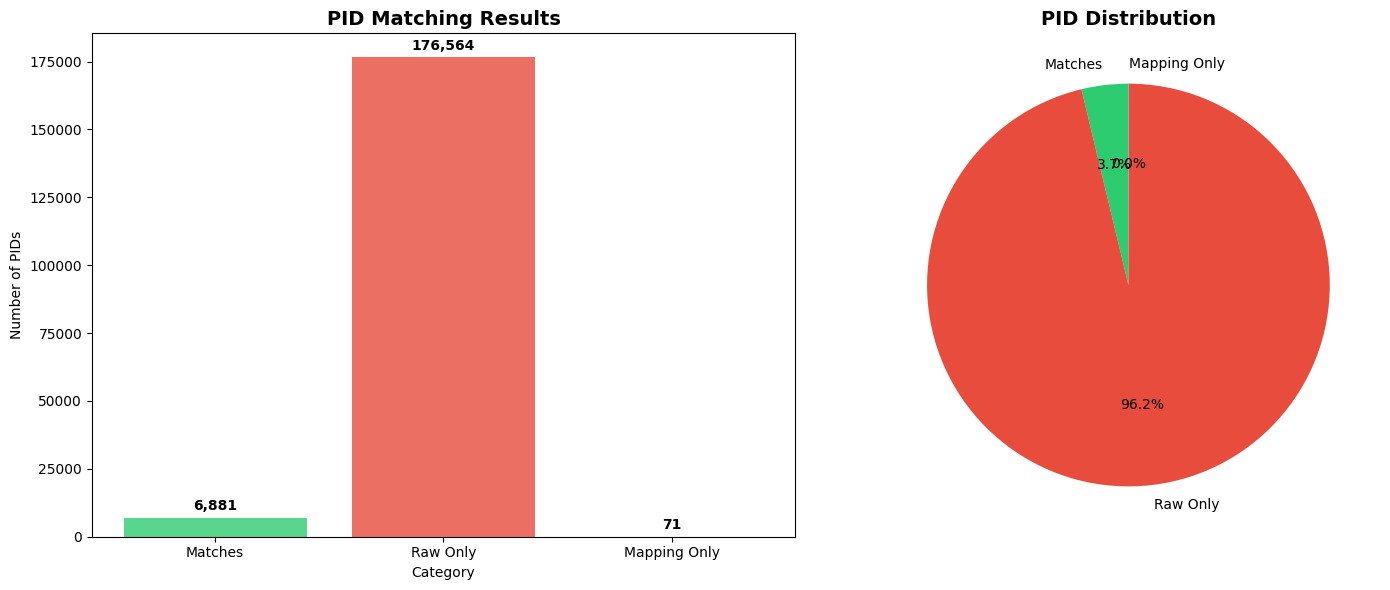


📈 Summary Statistics:
  • Total unique PIDs in raw data: 183,445
  • Total unique PIDs in mapping data: 6,952
  • Matching PIDs: 6,881 (3.8% of raw data)
  • Non-matching PIDs in raw data: 176,564
  • Non-matching PIDs in mapping data: 71


In [10]:
# Create a visualization of the matching results
if pid_columns and mapping_pid_columns and len(matches) > 0:
    print(f"\n📊 Creating Visualization")
    print("=" * 30)
    
    # Prepare data for visualization
    categories = ['Matches', 'Raw Only', 'Mapping Only']
    counts = [len(matches), len(raw_only), len(mapping_only)]
    colors = ['#2ecc71', '#e74c3c', '#3498db']
    
    # Create the plot
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Bar chart
    bars = ax1.bar(categories, counts, color=colors, alpha=0.8)
    ax1.set_title('PID Matching Results', fontsize=14, fontweight='bold')
    ax1.set_ylabel('Number of PIDs')
    ax1.set_xlabel('Category')
    
    # Add value labels on bars
    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height + max(counts)*0.01,
                f'{count:,}', ha='center', va='bottom', fontweight='bold')
    
    # Pie chart
    ax2.pie(counts, labels=categories, colors=colors, autopct='%1.1f%%', startangle=90)
    ax2.set_title('PID Distribution', fontsize=14, fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    # Summary statistics
    print(f"\n📈 Summary Statistics:")
    print(f"  • Total unique PIDs in raw data: {len(raw_pids):,}")
    print(f"  • Total unique PIDs in mapping data: {len(mapping_pids):,}")
    print(f"  • Matching PIDs: {len(matches):,} ({raw_match_rate:.1f}% of raw data)")
    print(f"  • Non-matching PIDs in raw data: {len(raw_only):,}")
    print(f"  • Non-matching PIDs in mapping data: {len(mapping_only):,}")
    
else:
    print("❌ Cannot create visualization - no matching data found")


In [11]:
# Create merged dataset with matching PIDs
if pid_columns and mapping_pid_columns:
    print("🔗 Creating Merged Dataset")
    print("=" * 35)
    
    raw_pid_col = pid_columns[0]
    mapping_pid_col = mapping_pid_columns[0]
    
    # Convert PIDs to string for consistent matching
    df[raw_pid_col] = df[raw_pid_col].astype(str)
    mapping_df[mapping_pid_col] = mapping_df[mapping_pid_col].astype(str)
    
    # Perform the merge
    print("Merging datasets...")
    merged_df = mapping_df.merge(
        df, 
        left_on=mapping_pid_col, 
        right_on=raw_pid_col, 
        how='inner'  # Only keep records that exist in both datasets
    )
    
    print(f"✅ Merge completed!")
    print(f"📊 Merged dataset shape: {merged_df.shape}")
    print(f"🏠 Records in merged dataset: {len(merged_df):,}")
    
    # Show the structure of the merged dataset
    print(f"\n📋 Merged dataset columns ({len(merged_df.columns)} total):")
    for i, col in enumerate(merged_df.columns):
        print(f"  {i+1:2d}. {col}")
    
else:
    print("❌ Cannot create merged dataset - missing PID columns")


🔗 Creating Merged Dataset
Merging datasets...
✅ Merge completed!
📊 Merged dataset shape: (8004, 75)
🏠 Records in merged dataset: 8,004

📋 Merged dataset columns (75 total):
   1. STRUCT_ID
   2. OFFICIAL_PAR_ID
   3. AREA_SQ_FT
   4. SOURCE
   5. LOCAL_ID
   6. PARCEL_LOC_ID
   7. PARCEL_POLY_TYPE
   8. PARCEL_MAP_NO
   9. PARCEL_TOWN_ID
  10. PID
  11. CM_ID
  12. GIS_ID
  13. ST_NUM
  14. ST_NUM2
  15. ST_NAME
  16. UNIT_NUM
  17. CITY
  18. ZIP_CODE
  19. BLDG_SEQ
  20. NUM_BLDGS
  21. LUC
  22. LU
  23. LU_DESC
  24. BLDG_TYPE
  25. OWN_OCC
  26. OWNER
  27. MAIL_ADDRESSEE
  28. MAIL_STREET_ADDRESS
  29. MAIL_CITY
  30. MAIL_STATE
  31. MAIL_ZIP_CODE
  32. RES_FLOOR
  33. CD_FLOOR
  34. RES_UNITS
  35. COM_UNITS
  36. RC_UNITS
  37. LAND_SF
  38. GROSS_AREA
  39. LIVING_AREA
  40. LAND_VALUE
  41. BLDG_VALUE
  42. SFYI_VALUE
  43. TOTAL_VALUE
  44.  GROSS_TAX 
  45. YR_BUILT
  46. YR_REMODEL
  47. STRUCTURE_CLASS
  48. ROOF_STRUCTURE
  49. ROOF_COVER
  50. INT_WALL
  51. EXT_FNISHE

In [12]:
# Analyze the merged dataset
if 'merged_df' in locals():
    print("📊 Merged Dataset Analysis")
    print("=" * 30)
    
    # Check for duplicates in the merged dataset
    duplicate_par_ids = merged_df[mapping_pid_col].duplicated().sum()
    print(f"🔄 Duplicate par_ids in merged data: {duplicate_par_ids:,}")
    
    # Show sample of merged data
    print(f"\n📋 Sample of merged data (first 3 rows):")
    sample_cols = [mapping_pid_col, 'address', 'property_type', 'fy2025_total_assessed_value'] if 'address' in merged_df.columns else [mapping_pid_col]
    print(merged_df[sample_cols].head(3))
    
    # Check data completeness
    print(f"\n📈 Data completeness in merged dataset:")
    completeness = merged_df.notna().sum() / len(merged_df) * 100
    low_completeness = completeness[completeness < 50].sort_values()
    
    if len(low_completeness) > 0:
        print(f"Columns with < 50% completeness:")
        for col, pct in low_completeness.items():
            print(f"  • {col}: {pct:.1f}%")
    else:
        print("All columns have > 50% completeness")
    
    # Summary statistics
    print(f"\n💡 Summary:")
    print(f"  • Total merged records: {len(merged_df):,}")
    print(f"  • Unique par_ids: {merged_df[mapping_pid_col].nunique():,}")
    print(f"  • Total columns: {len(merged_df.columns)}")
    print(f"  • Memory usage: {merged_df.memory_usage(deep=True).sum() / 1024**2:.1f} MB")


📊 Merged Dataset Analysis
🔄 Duplicate par_ids in merged data: 1,123

📋 Sample of merged data (first 3 rows):
  OFFICIAL_PAR_ID
0      2204999000
1      2205022000
2      2102767000

📈 Data completeness in merged dataset:
Columns with < 50% completeness:
  • CORNER_UNIT: 0.0%
  • UNIT_NUM: 0.0%
  • CD_FLOOR: 0.0%
  • ORIENTATION: 0.0%
  • HEAT_SYSTEM: 0.0%
  • BDRM_COND: 0.0%
  • RES_UNITS: 7.7%
  • COM_UNITS: 7.7%
  • RC_UNITS: 7.7%
  • CM_ID: 7.8%
  • KITCHEN_STYLE3: 13.0%
  • STRUCTURE_CLASS: 21.8%
  • MAIL_ADDRESSEE: 25.7%
  • ST_NUM2: 30.2%
  • BTHRM_STYLE3: 31.5%
  • YR_REMODEL: 49.1%
  • KITCHEN_STYLE2: 49.1%

💡 Summary:
  • Total merged records: 8,004
  • Unique par_ids: 6,881
  • Total columns: 75
  • Memory usage: 20.9 MB


In [13]:
# Save the merged dataset to CSV
if 'merged_df' in locals():
    print("💾 Saving Merged Dataset")
    print("=" * 30)
    
    # Define output file path
    output_file = '../data/processed/merged_property_assessment_data.csv'
    
    # Save to CSV
    print(f"Saving merged dataset to: {output_file}")
    merged_df.to_csv(output_file, index=False)
    
    print(f"✅ Successfully saved {len(merged_df):,} records to CSV")
    print(f"📁 File location: {output_file}")
    print(f"💾 File size: {merged_df.memory_usage(deep=True).sum() / 1024**2:.1f} MB")
    
    # Verify the saved file
    import os
    if os.path.exists(output_file):
        file_size = os.path.getsize(output_file) / 1024**2
        print(f"📊 Actual file size on disk: {file_size:.1f} MB")
        
        # Quick verification by reading a few rows
        verify_df = pd.read_csv(output_file, nrows=5)
        print(f"✅ Verification: File contains {len(verify_df)} sample rows")
        print(f"📋 Columns in saved file: {len(verify_df.columns)}")
    
    print(f"\n🎉 Merge and save completed successfully!")
    print(f"📊 Final dataset contains {len(merged_df):,} records with {len(merged_df.columns)} columns")
    
else:
    print("❌ No merged dataset available to save")


💾 Saving Merged Dataset
Saving merged dataset to: ../data/processed/merged_property_assessment_data.csv
✅ Successfully saved 8,004 records to CSV
📁 File location: ../data/processed/merged_property_assessment_data.csv
💾 File size: 20.9 MB
📊 Actual file size on disk: 4.2 MB
✅ Verification: File contains 5 sample rows
📋 Columns in saved file: 75

🎉 Merge and save completed successfully!
📊 Final dataset contains 8,004 records with 75 columns


In [14]:
# Analyze buildings with LOCAL_ID
print("🏢 Analyzing Buildings with LOCAL_ID")
print("=" * 40)

# Load the GeoJSON file
import json
import geopandas as gpd

# Load the buildings GeoJSON
buildings_gdf = gpd.read_file('../data/processed/geospatial_data/allston_brighton_buildings.geojson')

print(f"✅ Loaded {len(buildings_gdf):,} buildings from GeoJSON")
print(f"📋 Buildings dataset shape: {buildings_gdf.shape}")

# Check LOCAL_ID column
print(f"\n🔍 LOCAL_ID Analysis:")
print(f"  • Total buildings: {len(buildings_gdf):,}")
print(f"  • Buildings with LOCAL_ID: {buildings_gdf['LOCAL_ID'].notna().sum():,}")
print(f"  • Buildings without LOCAL_ID: {buildings_gdf['LOCAL_ID'].isna().sum():,}")

# Check for empty strings vs null values
local_id_filled = buildings_gdf['LOCAL_ID'].fillna('')
empty_strings = (local_id_filled == '').sum()
null_values = buildings_gdf['LOCAL_ID'].isna().sum()
actual_values = (local_id_filled != '').sum()

print(f"\n📊 LOCAL_ID Value Breakdown:")
print(f"  • Actual LOCAL_ID values: {actual_values:,}")
print(f"  • Empty strings (' '): {empty_strings:,}")
print(f"  • Null values: {null_values:,}")

# Show sample of buildings with LOCAL_ID
buildings_with_local_id = buildings_gdf[buildings_gdf['LOCAL_ID'].notna() & (buildings_gdf['LOCAL_ID'] != '')]
print(f"\n📋 Sample buildings with LOCAL_ID:")
if len(buildings_with_local_id) > 0:
    sample_cols = ['STRUCT_ID', 'LOCAL_ID', 'AREA_SQ_FT', 'SOURCE']
    print(buildings_with_local_id[sample_cols].head(10))
else:
    print("No buildings found with valid LOCAL_ID values")


🏢 Analyzing Buildings with LOCAL_ID
✅ Loaded 10,282 buildings from GeoJSON
📋 Buildings dataset shape: (10282, 19)

🔍 LOCAL_ID Analysis:
  • Total buildings: 10,282
  • Buildings with LOCAL_ID: 10,271
  • Buildings without LOCAL_ID: 11

📊 LOCAL_ID Value Breakdown:
  • Actual LOCAL_ID values: 10,271
  • Empty strings (' '): 11
  • Null values: 11

📋 Sample buildings with LOCAL_ID:
        STRUCT_ID           LOCAL_ID   AREA_SQ_FT          SOURCE
1   229741_899929                     3579.128465  City of Boston
2   228352_898978  Bos_2204999000_B0  1180.558745  City of Boston
3   228162_899135  Bos_2205022000_B0  1841.603376  City of Boston
4   228729_899340  Bos_2102767000_B0  1646.332561  City of Boston
5   228399_899359  Bos_2204953000_B0  1792.227216  City of Boston
6   228354_899043  Bos_2204989000_B0  1288.259080  City of Boston
7   228825_900407  Bos_2202216000_B0  1604.589070  City of Boston
8   228838_900402  Bos_2202217000_B0  1542.332381  City of Boston
9   228803_900405  Bos_2

In [15]:
# Additional analysis of LOCAL_ID patterns
print("🔍 Detailed LOCAL_ID Analysis")
print("=" * 35)

# Check unique LOCAL_ID values
unique_local_ids = buildings_gdf['LOCAL_ID'].nunique()
print(f"📊 Unique LOCAL_ID values: {unique_local_ids:,}")

# Check for patterns in LOCAL_ID
if len(buildings_with_local_id) > 0:
    local_id_values = buildings_with_local_id['LOCAL_ID'].astype(str)
    
    print(f"\n📋 LOCAL_ID Value Patterns:")
    print(f"  • Unique non-empty LOCAL_IDs: {local_id_values.nunique():,}")
    print(f"  • Most common LOCAL_ID: {local_id_values.value_counts().head(1).index[0] if len(local_id_values) > 0 else 'N/A'}")
    
    # Check for numeric vs text patterns
    numeric_ids = local_id_values.str.match(r'^\d+$').sum()
    text_ids = len(local_id_values) - numeric_ids
    
    print(f"  • Numeric LOCAL_IDs: {numeric_ids:,}")
    print(f"  • Text LOCAL_IDs: {text_ids:,}")
    
    # Show distribution of LOCAL_ID lengths
    id_lengths = local_id_values.str.len()
    print(f"\n📏 LOCAL_ID Length Distribution:")
    print(f"  • Average length: {id_lengths.mean():.1f} characters")
    print(f"  • Min length: {id_lengths.min()}")
    print(f"  • Max length: {id_lengths.max()}")
    
    # Show length distribution
    length_counts = id_lengths.value_counts().sort_index()
    print(f"  • Length distribution:")
    for length, count in length_counts.head(10).items():
        print(f"    {length} chars: {count:,} buildings")

# Summary statistics
print(f"\n📈 Summary:")
print(f"  • Total buildings: {len(buildings_gdf):,}")
print(f"  • Buildings with valid LOCAL_ID: {actual_values:,} ({actual_values/len(buildings_gdf)*100:.1f}%)")
print(f"  • Buildings without LOCAL_ID: {len(buildings_gdf) - actual_values:,} ({(len(buildings_gdf) - actual_values)/len(buildings_gdf)*100:.1f}%)")


🔍 Detailed LOCAL_ID Analysis
📊 Unique LOCAL_ID values: 8,054

📋 LOCAL_ID Value Patterns:
  • Unique non-empty LOCAL_IDs: 8,054
  • Most common LOCAL_ID:  
  • Numeric LOCAL_IDs: 0
  • Text LOCAL_IDs: 10,271

📏 LOCAL_ID Length Distribution:
  • Average length: 13.6 characters
  • Min length: 1
  • Max length: 18
  • Length distribution:
    1 chars: 2,178 buildings
    17 chars: 8,036 buildings
    18 chars: 57 buildings

📈 Summary:
  • Total buildings: 10,282
  • Buildings with valid LOCAL_ID: 10,271 (99.9%)
  • Buildings without LOCAL_ID: 11 (0.1%)


In [16]:
# Show samples of specific LOCAL_ID lengths
print("📋 Sample LOCAL_ID Values by Length")
print("=" * 40)

# 1-character LOCAL_IDs
one_char = buildings_gdf[buildings_gdf['LOCAL_ID'].str.len() == 1]
print(f"🏠 1-character LOCAL_IDs ({len(one_char):,} total):")
print(one_char[['STRUCT_ID', 'LOCAL_ID', 'AREA_SQ_FT']].head(10))

print(f"\n🏢 18-character LOCAL_IDs ({len(buildings_gdf[buildings_gdf['LOCAL_ID'].str.len() == 18]):,} total):")
eighteen_char = buildings_gdf[buildings_gdf['LOCAL_ID'].str.len() == 18]
print(eighteen_char[['STRUCT_ID', 'LOCAL_ID', 'AREA_SQ_FT']].head(10))


📋 Sample LOCAL_ID Values by Length
🏠 1-character LOCAL_IDs (2,178 total):
        STRUCT_ID LOCAL_ID    AREA_SQ_FT
1   229741_899929            3579.128465
14  230778_900702             530.651252
15  228880_900857              67.538603
16  227052_900472             492.111194
17  229300_900824           98087.059778
20  228728_898669             513.569268
21  229895_900517            1275.176283
22  229998_900616            9744.288249
37  228173_899067             432.451631
38  228329_899094             241.600788

🏢 18-character LOCAL_IDs (57 total):
          STRUCT_ID            LOCAL_ID   AREA_SQ_FT
479   227451_898678  Bos_2102473001_B26  1436.127521
1355  231073_901751  Bos_2200530000_B12  8757.725610
1364  230986_901994  Bos_2200530000_B21  1914.152467
1630  227468_898662  Bos_2102473001_B12  2789.336791
1955  231065_901952  Bos_2200530000_B19  1938.969419
1980  231140_901878  Bos_2200530000_B23  1629.356551
2484  227435_898599  Bos_2102473001_B18  2832.566433
2761  227566_

In [17]:
# Extract numeric part from Bos_*_B pattern
print("🔢 Extracting Numeric IDs from Bos_*_B Pattern")
print("=" * 45)

# Filter for 17-18 char LOCAL_IDs that match Bos_*_B pattern
pattern_ids = buildings_gdf[
    (buildings_gdf['LOCAL_ID'].str.len().isin([17, 18])) & 
    (buildings_gdf['LOCAL_ID'].str.match(r'^Bos_\d+_B\d+$', na=False))
]

print(f"📊 Found {len(pattern_ids):,} LOCAL_IDs matching Bos_*_B pattern")

# Extract the numeric part between Bos_ and _B
pattern_ids['numeric_part'] = pattern_ids['LOCAL_ID'].str.extract(r'Bos_(\d+)_B')
unique_numeric_ids = pattern_ids['numeric_part'].nunique()

print(f"🔢 Unique numeric IDs: {unique_numeric_ids:,}")

# Show samples
print(f"\n📋 Sample pattern matches:")
sample_cols = ['STRUCT_ID', 'LOCAL_ID', 'numeric_part', 'AREA_SQ_FT']
print(pattern_ids[sample_cols].head(10))

print(f"\n📈 Summary:")
print(f"  • Total Bos_*_B pattern matches: {len(pattern_ids):,}")
print(f"  • Unique numeric IDs extracted: {unique_numeric_ids:,}")
print(f"  • Duplicate numeric IDs: {len(pattern_ids) - unique_numeric_ids:,}")


🔢 Extracting Numeric IDs from Bos_*_B Pattern
📊 Found 8,093 LOCAL_IDs matching Bos_*_B pattern
🔢 Unique numeric IDs: 6,952

📋 Sample pattern matches:
        STRUCT_ID           LOCAL_ID numeric_part   AREA_SQ_FT
2   228352_898978  Bos_2204999000_B0   2204999000  1180.558745
3   228162_899135  Bos_2205022000_B0   2205022000  1841.603376
4   228729_899340  Bos_2102767000_B0   2102767000  1646.332561
5   228399_899359  Bos_2204953000_B0   2204953000  1792.227216
6   228354_899043  Bos_2204989000_B0   2204989000  1288.259080
7   228825_900407  Bos_2202216000_B0   2202216000  1604.589070
8   228838_900402  Bos_2202217000_B0   2202217000  1542.332381
9   228803_900405  Bos_2202232000_B0   2202232000  1797.183188
10  228938_900298  Bos_2202245000_B0   2202245000  1574.555280
11  228972_900291  Bos_2202247000_B0   2202247000  1654.027769

📈 Summary:
  • Total Bos_*_B pattern matches: 8,093
  • Unique numeric IDs extracted: 6,952
  • Duplicate numeric IDs: 1,141


/Users/Studies/Projects/ds-abcdc-allston/.venv/lib/python3.13/site-packages/geopandas/geodataframe.py:1968: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [21]:
# Create building-property merged dataset with suffix identification
print("🏢 Creating Building-Property Dataset with Suffix")
print("=" * 50)

# Step 1: Extract numeric parcel IDs and suffixes from LOCAL_ID
print("Step 1: Extracting parcel IDs and suffixes...")

# Filter buildings with Bos_*_B pattern and extract components
building_data = buildings_gdf[
    (buildings_gdf['LOCAL_ID'].str.len().isin([17, 18])) & 
    (buildings_gdf['LOCAL_ID'].str.match(r'^Bos_\d+_B\d+$', na=False))
].copy()

# Extract parcel_id and suffix
building_data['parcel_id'] = building_data['LOCAL_ID'].str.extract(r'Bos_(\d+)_B')
building_data['suffix'] = building_data['LOCAL_ID'].str.extract(r'Bos_\d+_B(\d+)')

print(f"✅ Found {len(building_data):,} buildings with Bos_*_B pattern")
print(f"📊 Unique parcel IDs: {building_data['parcel_id'].nunique():,}")
print(f"📊 Unique suffixes: {building_data['suffix'].nunique():,}")

# Show sample
print(f"\n📋 Sample building data:")
sample_cols = ['STRUCT_ID', 'LOCAL_ID', 'parcel_id', 'suffix', 'AREA_SQ_FT']
print(building_data[sample_cols].head(10))


🏢 Creating Building-Property Dataset with Suffix
Step 1: Extracting parcel IDs and suffixes...
✅ Found 8,093 buildings with Bos_*_B pattern
📊 Unique parcel IDs: 6,952
📊 Unique suffixes: 35

📋 Sample building data:
        STRUCT_ID           LOCAL_ID   parcel_id suffix   AREA_SQ_FT
2   228352_898978  Bos_2204999000_B0  2204999000      0  1180.558745
3   228162_899135  Bos_2205022000_B0  2205022000      0  1841.603376
4   228729_899340  Bos_2102767000_B0  2102767000      0  1646.332561
5   228399_899359  Bos_2204953000_B0  2204953000      0  1792.227216
6   228354_899043  Bos_2204989000_B0  2204989000      0  1288.259080
7   228825_900407  Bos_2202216000_B0  2202216000      0  1604.589070
8   228838_900402  Bos_2202217000_B0  2202217000      0  1542.332381
9   228803_900405  Bos_2202232000_B0  2202232000      0  1797.183188
10  228938_900298  Bos_2202245000_B0  2202245000      0  1574.555280
11  228972_900291  Bos_2202247000_B0  2202247000      0  1654.027769


In [23]:
# Step 2: Match with property assessment data
print("\nStep 2: Matching with property assessment data...")

# Convert parcel_id to string for matching
building_data['parcel_id'] = building_data['parcel_id'].astype(str)
df[raw_pid_col] = df[raw_pid_col].astype(str)

# Perform the merge
merged_building_property = building_data.merge(
    df, 
    left_on='parcel_id', 
    right_on=raw_pid_col, 
    how='inner'
)

print(f"✅ Merge completed!")
print(f"📊 Merged dataset shape: {merged_building_property.shape}")
print(f"🏠 Buildings matched with property data: {len(merged_building_property):,}")

# Show sample of merged data
print(f"\n📋 Sample merged data:")
sample_cols = ['STRUCT_ID', 'LOCAL_ID', 'parcel_id', 'suffix', 'address', 'property_type', 'fy2025_total_assessed_value']
available_cols = [col for col in sample_cols if col in merged_building_property.columns]
print(merged_building_property[available_cols].head(5))



Step 2: Matching with property assessment data...
✅ Merge completed!
📊 Merged dataset shape: (8002, 87)
🏠 Buildings matched with property data: 8,002

📋 Sample merged data:
       STRUCT_ID           LOCAL_ID   parcel_id suffix
0  228352_898978  Bos_2204999000_B0  2204999000      0
1  228162_899135  Bos_2205022000_B0  2205022000      0
2  228729_899340  Bos_2102767000_B0  2102767000      0
3  228399_899359  Bos_2204953000_B0  2204953000      0
4  228354_899043  Bos_2204989000_B0  2204989000      0


In [24]:
# Step 3: Analyze and save the final dataset
print("\nStep 3: Analyzing and saving final dataset...")

# Analysis
print(f"📊 Final Dataset Analysis:")
print(f"  • Total building-property records: {len(merged_building_property):,}")
print(f"  • Unique parcels: {merged_building_property['parcel_id'].nunique():,}")
print(f"  • Unique buildings: {merged_building_property['STRUCT_ID'].nunique():,}")
print(f"  • Unique suffixes: {merged_building_property['suffix'].nunique():,}")

# Check suffix distribution
suffix_counts = merged_building_property['suffix'].value_counts().sort_index()
print(f"\n📈 Suffix Distribution:")
print(suffix_counts.head(10))

# Save to CSV
output_file = '../data/processed/building_property_with_suffix.csv'
print(f"\n💾 Saving to: {output_file}")
merged_building_property.to_csv(output_file, index=False)

print(f"✅ Successfully saved {len(merged_building_property):,} records")
print(f"📁 File: {output_file}")
print(f"📊 Columns: {len(merged_building_property.columns)}")

print(f"\n🎉 Building-Property dataset with suffix identification created!")



Step 3: Analyzing and saving final dataset...
📊 Final Dataset Analysis:
  • Total building-property records: 8,002
  • Unique parcels: 6,880
  • Unique buildings: 8,002
  • Unique suffixes: 35

📈 Suffix Distribution:
suffix
0     6902
1      888
10       4
11       3
12       3
13       4
14       3
15       4
16       3
17       3
Name: count, dtype: int64

💾 Saving to: ../data/processed/building_property_with_suffix.csv
✅ Successfully saved 8,002 records
📁 File: ../data/processed/building_property_with_suffix.csv
📊 Columns: 87

🎉 Building-Property dataset with suffix identification created!


In [25]:
# Investigate missing buildings
print("🔍 Investigating Missing Buildings")
print("=" * 35)

# Find buildings that didn't match
matched_parcel_ids = set(merged_building_property['parcel_id'])
all_building_parcel_ids = set(building_data['parcel_id'])
missing_parcel_ids = all_building_parcel_ids - matched_parcel_ids

print(f"📊 Missing Analysis:")
print(f"  • Buildings found: {len(building_data):,}")
print(f"  • Buildings matched: {len(merged_building_property):,}")
print(f"  • Buildings missing: {len(building_data) - len(merged_building_property):,}")
print(f"  • Unique parcel IDs in buildings: {len(all_building_parcel_ids):,}")
print(f"  • Unique parcel IDs matched: {len(matched_parcel_ids):,}")
print(f"  • Unique parcel IDs missing: {len(missing_parcel_ids):,}")

# Show sample of missing parcel IDs
if missing_parcel_ids:
    print(f"\n❌ Sample missing parcel IDs:")
    missing_sample = list(missing_parcel_ids)[:10]
    for pid in missing_sample:
        print(f"  • {pid}")
    
    # Check if these parcel IDs exist in property data
    property_parcel_ids = set(df[raw_pid_col].astype(str))
    missing_in_property = missing_parcel_ids - property_parcel_ids
    print(f"\n🔍 Missing parcel IDs not in property data: {len(missing_in_property):,}")
    
    if missing_in_property:
        print("Sample parcel IDs not found in property data:")
        for pid in list(missing_in_property)[:5]:
            print(f"  • {pid}")
else:
    print("✅ All buildings matched successfully!")


🔍 Investigating Missing Buildings
📊 Missing Analysis:
  • Buildings found: 8,093
  • Buildings matched: 8,002
  • Buildings missing: 91
  • Unique parcel IDs in buildings: 6,952
  • Unique parcel IDs matched: 6,880
  • Unique parcel IDs missing: 72

❌ Sample missing parcel IDs:
  • 2101836000
  • 2200997000
  • 2201012000
  • 2201886002
  • 0401994000
  • 2201008000
  • 2200863070
  • 2102439000
  • 2203221000
  • 2200630040

🔍 Missing parcel IDs not in property data: 72
Sample parcel IDs not found in property data:
  • 2101836000
  • 2200997000
  • 2201012000
  • 2201886002
  • 0401994000


In [26]:
import pandas as pd

csv_path = "../data/processed/building_property_with_suffix.csv"
df_cols = pd.read_csv(csv_path, nrows=0).columns.tolist()
print("Columns in building_property_with_suffix.csv:")
for col in df_cols:
    print(f"- {col}")


Columns in building_property_with_suffix.csv:
- STRUCT_ID
- SOURCE
- SOURCETYPE
- SOURCEDATE
- SOURCEDATA
- MOVED
- AREA_SQ_FT
- TOWN_ID
- TOWN_ID2
- TOWN_ID3
- LOCAL_ID
- ARCHIVED
- ARCHIVEDATE
- EDIT_DATE
- EDIT_BY
- COMMENTS
- Shape_Length
- Shape_Area
- geometry
- parcel_id
- suffix
- PID
- CM_ID
- GIS_ID
- ST_NUM
- ST_NUM2
- ST_NAME
- UNIT_NUM
- CITY
- ZIP_CODE
- BLDG_SEQ
- NUM_BLDGS
- LUC
- LU
- LU_DESC
- BLDG_TYPE
- OWN_OCC
- OWNER
- MAIL_ADDRESSEE
- MAIL_STREET_ADDRESS
- MAIL_CITY
- MAIL_STATE
- MAIL_ZIP_CODE
- RES_FLOOR
- CD_FLOOR
- RES_UNITS
- COM_UNITS
- RC_UNITS
- LAND_SF
- GROSS_AREA
- LIVING_AREA
- LAND_VALUE
- BLDG_VALUE
- SFYI_VALUE
- TOTAL_VALUE
-  GROSS_TAX 
- YR_BUILT
- YR_REMODEL
- STRUCTURE_CLASS
- ROOF_STRUCTURE
- ROOF_COVER
- INT_WALL
- EXT_FNISHED
- INT_COND
- EXT_COND
- OVERALL_COND
- BED_RMS
- FULL_BTH
- HLF_BTH
- KITCHENS
- TT_RMS
- BDRM_COND
- BTHRM_STYLE1
- BTHRM_STYLE2
- BTHRM_STYLE3
- KITCHEN_TYPE
- KITCHEN_STYLE1
- KITCHEN_STYLE2
- KITCHEN_STYLE3
- HEAT_